<h1>8. 지도학습 : 회귀</h1>

## 8.1. 상관분석
### 8.1.1. 상관계수
+ 상관분석(correlation analysis)
  + 두 수치형 변수 간 선형적인 관계(linear relationship)를 파악하는 통계 기법
  + 상관계수(correlation coefficient)
    + 두 변수 간 상관관계를 수치로 나타내어 정량화한 지표
    + 상관계수의 절대값은 선형성의 강도를, 부호는 선형성의 방향성을 나타냄
    + 변수의 측정 단위의 영향을 받지 않음

<br>

+ 상관계수의 성질
  + 상관계수 r은 항상 -1에서 +1 사이의 값을 가짐
  + 절대값이 1에 가까울수록 강한 상관관계를 의미함
  + r>0이면 양의 상관관계, r<0이면 음의 상관관계, r=0이면 상관관계가 없음을 나타냄
    + 양의 상관관계 : 한 변수가 증가할 때 다른 변수도 증가
    + 음의 상관관계 : 한 변수가 증가할 때 다른 변수는 감소
    + 상관관계 없음 : 한 변수가 증가할 때 다른 변수는 영향을 받지 않음

<br>

![](./images/fig3-6.jpg){width=70%}

<br>

### 8.1.2. (실습) 행복지수 데이터 분석
+ \[데이터\] 캐글에서 제공하는 전세계 행복지수 데이터
  + 평가지표 : 1인당 GDP, 사회적 지지 정도, 건강한 기대수명, 인생 선택의 자유, 기부
  + \[실습파일\] [2020.csv](./data/2020.csv), [2021.csv](./data/2021.csv)

<br>

> **행복지수와 관련된 요인은 무엇일까?**

<br>

In [1]:
## (1) 데이터 확인 및 전처리

In [2]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 데이터 불러오기
df2020 = pd.read_csv('./data/2020.csv', index_col=0)
df2021 = pd.read_csv('./data/2021.csv', index_col=0)

In [4]:
# 열 정보
df2020.dtypes

Country name                     object
Happiness score                 float64
upperwhisker                    float64
lowerwhisker                    float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Dystopia                        float64
dtype: object

In [5]:
# 2020년 데이터 확인
df2020.head()

,Country name,Happiness score,upperwhisker,lowerwhisker,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Dystopia
Rank,,,,,,,,,,
1,Finland,7.8087,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,2.762835
2,Denmark,7.6456,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,2.432741
3,Switzerland,7.5599,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,2.350267
4,Iceland,7.5045,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,2.460688
5,Norway,7.4880,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,2.168266


In [6]:
# 2021년 데이터 확인
df2021.head()

,Country name,Happiness score,upperwhisker,lowerwhisker,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Dystopia
Rank,,,,,,,,,,
1,Finland,7.842,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,3.253
2,Denmark,7.620,7.687,7.552,10.933,0.954,72.7,0.946,0.030,2.868
3,Switzerland,7.571,7.643,7.500,11.117,0.942,74.4,0.919,0.025,2.839
4,Iceland,7.554,7.670,7.438,10.878,0.983,73.0,0.955,0.160,2.967
5,Netherlands,7.464,7.518,7.410,10.932,0.942,72.4,0.913,0.175,2.798


In [7]:
# 데이터 전처리 : 열 삭제
df2020.drop(['upperwhisker', 'lowerwhisker', 'Dystopia'], axis=1, inplace=True)
df2021.drop(['upperwhisker', 'lowerwhisker', 'Dystopia'], axis=1, inplace=True)

In [8]:
# 열 이름 변경 : 공백을 .으로 대체
#df2020.columns = df2020.columns.str.replace(' ','.')
#df2021.columns = df2021.columns.str.replace(' ','.')

In [9]:
# 열 이름 변경
df2020.columns = ['Country', 'Score', 'GDP.per.capita', 'Social.support', 'Life.expectancy', 'Freedom', 'Generosity']
df2021.columns = ['Country', 'Score', 'GDP.per.capita', 'Social.support', 'Life.expectancy', 'Freedom', 'Generosity']

<br>

In [10]:
## (2) 데이터 분석 및 시각화
## (2-1) 행복 점수와 기능의 상관관계
##       한 국가의 행복지수와 경제적(GDP), 법적 상태(Freedom)는 상관관계가 있는가?

In [11]:
# 2020년 데이터 전처리
df1 = df2020.copy()
df1.drop(['Social.support', 'Life.expectancy', 'Generosity'], axis=1, inplace=True)
df1.head()

,Country,Score,GDP.per.capita,Freedom
Rank,,,,
1,Finland,7.8087,10.639267,0.949172
2,Denmark,7.6456,10.774001,0.951444
3,Switzerland,7.5599,10.979933,0.921337
4,Iceland,7.5045,10.772559,0.948892
5,Norway,7.4880,11.087804,0.955750


In [12]:
# 상관관계 : 2020년 데이터
# 행복지수와 GDP 간 상관계수는 0.78로, 강한 양의 상관관계임
# 행복지수와 Freedom 간 상관계수는 0.59로, 뚜렷한 양의 상관관계임
corr = df1.select_dtypes(include='number').corr()
corr['Score'].sort_values(ascending=False)

Score             1.000000
GDP.per.capita    0.775374
Freedom           0.590597
Name: Score, dtype: float64

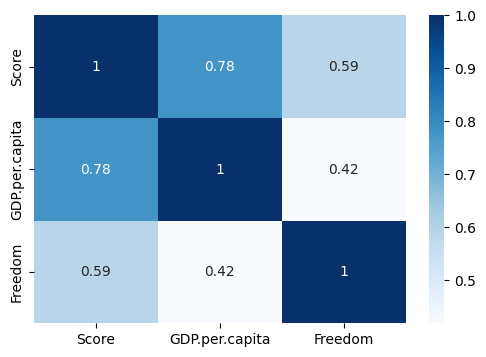

In [13]:
# 히트맵 : 2020년 데이터
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='Blues')
plt.show()

In [14]:
# 2021년 데이터 전처리
df2 = df2021.copy()
df2.drop(['Social.support', 'Life.expectancy', 'Generosity'], axis=1, inplace=True)
df2.head()

,Country,Score,GDP.per.capita,Freedom
Rank,,,,
1,Finland,7.842,10.775,0.949
2,Denmark,7.620,10.933,0.946
3,Switzerland,7.571,11.117,0.919
4,Iceland,7.554,10.878,0.955
5,Netherlands,7.464,10.932,0.913


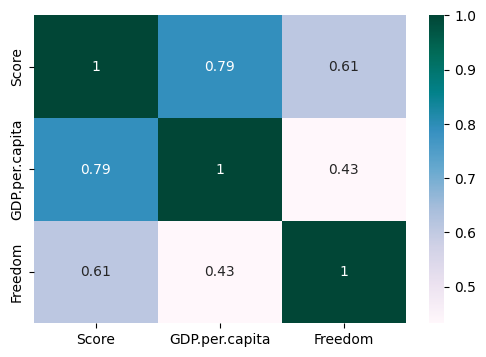

In [15]:
# 히트맵 : 2021년 데이터
# 행복지수와 GDP 간 상관계수는 0.79로, 강한 양의 상관관계임
# 헹복지수와 Freedom 간 상관계수는 0.61로, 뚜렷한 양의 상관관계임
plt.figure(figsize=(6, 4))
sns.heatmap(df2.select_dtypes(include='number').corr(), annot=True, cmap='PuBuGn')
plt.show()

<br>

##### 결과 및 시사점
+ 행복지수와 GDP 간 관계는?
  + 상관계수는 2020년 0.78, 2021년 0.79로, 강한 양의 상관관계로 나타남
  + 경제 성장은 보통 더 높은 소득과 향상된 생활 수준으로 이어지므로, 국민의 행복 수준도 높아지는 경향이 있음
  + 따라서 국민의 행복을 보장하기 위해, 국가의 GDP는 주요 우선순위 중 하나로 고려될 필요가 있음

<br>

+ 행복지수와 인생 선택의 자유 간 관계는?
  + 상관계수는 2020년 0.59, 2021년 0.61로, 뚜렷한 양의 상관관계로 나타남
  + 자유에 대한 인식은 지역과 문화에 따라 다양하기 때문에 일반화하기는 어려움
  + 그럼에도 불구하고, 개인이 삶을 선택할 자유를 얼마나 느끼는지는 국민의 행복 수준에 중요한 영향을 미침

<br>

In [16]:
## (2-2) 행복 점수와 사회적 상태의 상관관계
##       한 국가의 행복지수와 사회적 상태(Social.support)는 상관관계가 있는가?

In [17]:
# 데이터 전처리
x1 = df2020[['Generosity', 'Social.support', 'Score']].copy()
x2 = df2021[['Generosity', 'Social.support', 'Score']].copy()

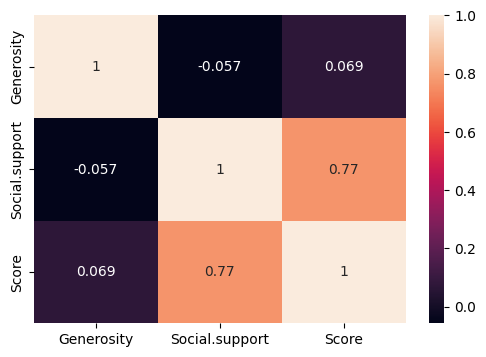

In [18]:
# 히트맵 : 2020년 데이터
a1 = x1.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(a1, annot=True)
plt.show()

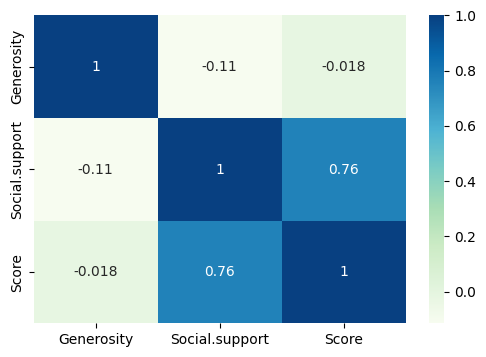

In [19]:
# 히트맵 : 2021년 데이터
a2 = x2.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(a2, annot=True, cmap='GnBu')
plt.show()

<br>

##### 결과 및 시사점
+ 행복지수와 사회적 지지 간 관계는?
  + 상관계수는 2020년 0.77, 2021년 0.76으로, 강한 양의 상관관계로 나타남
  + 사회적 지지는 가족, 친구, 지인 등과 함께하는 관계에서 느끼는 정서적 지원에 대한 인식을 의미함
  + 일상 생활에서 가깝게 지내는 사람들과의 관계에서 형성되므로, 사회적 지지는 행복 수준에 중요햔 요소임을 알 수 있음

<br>

+ 행복지수와 기부 문화 간 관계는?
  + 상관계수는 2020년 0.069, 2021년 -0.018로, 상관관계가 거의 없는 것으로 나타남
  + 따라서 기부 문화가 행복 수준과 직접적인 관련이 거의 없음을 확인할 수 있음

<br>

In [20]:
## (2-3) 행복 점수와 전체 변수의 상관관계

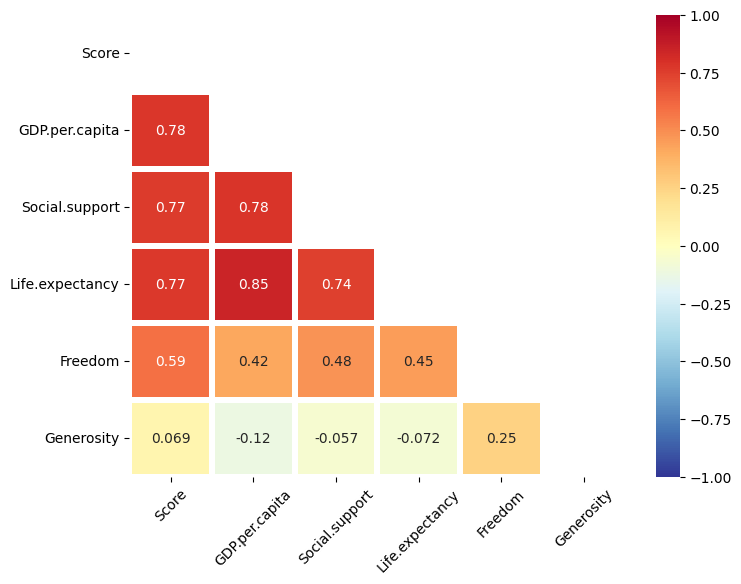

In [21]:
# 전체 상관계수 : 2020년 데이터
corr = df2020.select_dtypes(include='number').corr()

plt.figure(figsize=(8, 6))
upp_mat = np.triu(corr)
sns.heatmap(corr, mask=upp_mat,vmin=-1, vmax=1, annot=True, cmap ='RdYlBu_r', linewidths=4)
plt.xticks(rotation=45)
plt.show()

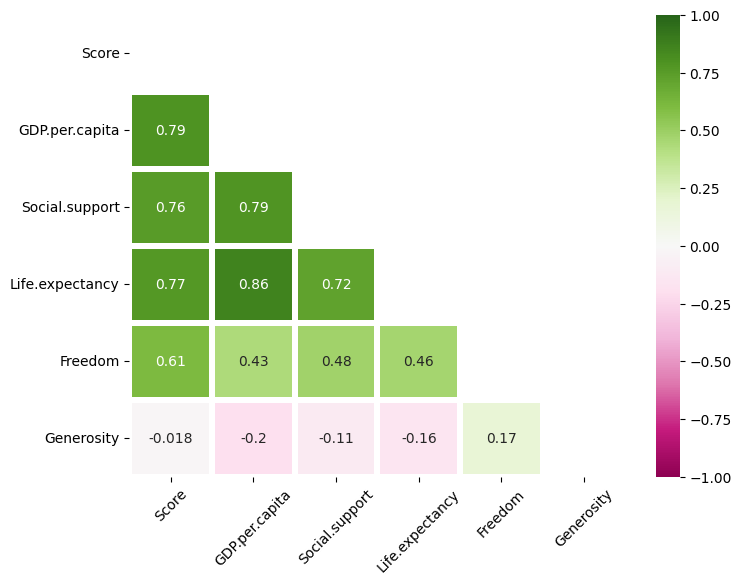

In [22]:
# 전체 상관계수 : 2021년 데이터
corr = df2021.select_dtypes(include='number').corr()

plt.figure(figsize=(8, 6))
upp_mat = np.triu(corr)
sns.heatmap(corr, mask=upp_mat, vmin=-1, vmax=1,annot = True, cmap ='PiYG', linewidths=4)
plt.xticks(rotation=45)
plt.show()

<br>

##### 결과 및 시사점
+ 행복지수에 가장 큰 영향을 미치는 요인은 경제적 여유(GDP, 0.79), 건강(0.77), 사회적 지지(0.76), 선택에 대한 자유도(0.61) 순으로 나타남
+ 기부 활동과 행복지수는 뚜렷한 관련이 없는 것으로 나타남
+ 1인당 GDP와 건강한 기대수명은 강한 양의 상관관계(0.86)가 있으므로, 경제적으로 여유로운 사람들이 더 건강하게 사는 경향이 있음을 알 수 있음

<br>

<br>

## 8.2. 회귀분석

In [23]:
# 한글 깨짐 현상에 대한 해결 방법
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.rc('font', family='Malgun Gothic')  # 또는 '맑은 고딕'
mpl.rcParams['axes.unicode_minus'] = False

In [24]:
# scikit-learn 설치하기
#!pip install scikit-learn

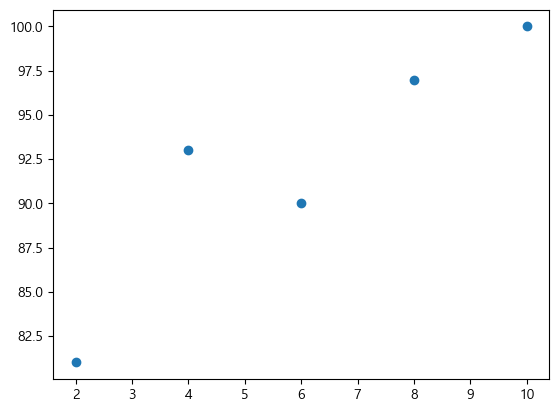

예상점수:[[94.3]]


In [25]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 공부시간 : 독립변수, 시험점수 : 종속변수
x = [[2],[4],[6],[8],[10]]       # 공부시간
y = [[81],[93],[90],[97],[100]]  # 시험점수

# 산점도 그래프
plt.scatter(x,y)
plt.show()

# 학습시키기
model = LinearRegression()      # 선형회귀분석 객체 생성하기

# 선형회귀분석 객체를 이용하여 학습시키기
model.fit(x,y)

# 예측하기
result = model.predict([[7]])   # 7시간 학습
print(f'예상점수:{result}')

<br>

### 8.2.1. 단순선형 회귀분석

<br>

In [26]:
# 데이터 불러오기
seoul = pd.read_csv('./data/(2010-2020) weather.csv', encoding='cp949')
seoul.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,2010-01-01,108,-7.6,-12.7,-3.6
1,2010-01-02,108,-3.6,-7.4,0.2
2,2010-01-03,108,-6.8,-10.5,-3.2
3,2010-01-04,108,-5.9,-8.0,-3.4
4,2010-01-05,108,-9.9,-12.3,-7.0


In [27]:
seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4018 entries, 0 to 4017
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   날짜       4018 non-null   object 
 1   지점       4018 non-null   int64  
 2   평균기온(℃)  4018 non-null   float64
 3   최저기온(℃)  4018 non-null   float64
 4   최고기온(℃)  4017 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 157.1+ KB


In [28]:
seoul.describe()

,지점,평균기온(℃),최저기온(℃),최고기온(℃)
count,4018.0,4018.000000,4018.000000,4017.000000
mean,108.0,12.965207,8.991015,17.699627
std,0.0,10.803691,10.932678,10.976719
min,108.0,-14.800000,-18.000000,-10.700000
25%,108.0,3.700000,-0.300000,8.200000
50%,108.0,14.250000,9.800000,19.600000
75%,108.0,22.800000,18.900000,27.400000
max,108.0,33.700000,30.300000,39.600000


In [29]:
# 지점 변수 삭제
seoul.drop('지점', axis=1, inplace=True)
seoul.head()

,날짜,평균기온(℃),최저기온(℃),최고기온(℃)
0,2010-01-01,-7.6,-12.7,-3.6
1,2010-01-02,-3.6,-7.4,0.2
2,2010-01-03,-6.8,-10.5,-3.2
3,2010-01-04,-5.9,-8.0,-3.4
4,2010-01-05,-9.9,-12.3,-7.0


In [30]:
seoul.head()

,날짜,평균기온(℃),최저기온(℃),최고기온(℃)
0,2010-01-01,-7.6,-12.7,-3.6
1,2010-01-02,-3.6,-7.4,0.2
2,2010-01-03,-6.8,-10.5,-3.2
3,2010-01-04,-5.9,-8.0,-3.4
4,2010-01-05,-9.9,-12.3,-7.0


In [31]:
# 열 이름 변경
seoul.columns = ['날짜', '평균기온', '최저기온', '최고기온']
seoul.columns

Index(['날짜', '평균기온', '최저기온', '최고기온'], dtype='object')

In [32]:
seoul.isnull().sum()

날짜      0
평균기온    0
최저기온    0
최고기온    1
dtype: int64

In [33]:
# 결측값을 포함하는 행 삭제
seoul.dropna(subset=['최고기온'], axis=0, inplace=True)

In [34]:
seoul.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4017 entries, 0 to 4017
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      4017 non-null   object 
 1   평균기온    4017 non-null   float64
 2   최저기온    4017 non-null   float64
 3   최고기온    4017 non-null   float64
dtypes: float64(3), object(1)
memory usage: 156.9+ KB


In [35]:
seoul['날짜'] = pd.to_datetime(seoul['날짜'])

In [36]:
# 열 추가
seoul['연도'] = seoul['날짜'].dt.year
seoul['월']=seoul['날짜'].dt.month
seoul['일']=seoul['날짜'].dt.day
seoul.head()

,날짜,평균기온,최저기온,최고기온,연도,월,일
0,2010-01-01,-7.6,-12.7,-3.6,2010,1,1
1,2010-01-02,-3.6,-7.4,0.2,2010,1,2
2,2010-01-03,-6.8,-10.5,-3.2,2010,1,3
3,2010-01-04,-5.9,-8.0,-3.4,2010,1,4
4,2010-01-05,-9.9,-12.3,-7.0,2010,1,5


In [37]:
# 필터링
conditions = (seoul['날짜'].dt.month==8) & (seoul['날짜'].dt.day==15)
seoul0815 = seoul[conditions]
seoul0815

,날짜,평균기온,최저기온,최고기온,연도,월,일
226,2010-08-15,26.6,24.6,30.2,2010,8,15
591,2011-08-15,24.5,22.9,26.9,2011,8,15
957,2012-08-15,23.7,22.4,27.1,2012,8,15
1322,2013-08-15,28.7,25.8,32.4,2013,8,15
1687,2014-08-15,24.9,20.9,29.6,2014,8,15
2052,2015-08-15,27.1,23.1,30.8,2015,8,15
2418,2016-08-15,29.1,25.8,34.0,2016,8,15
2783,2017-08-15,21.9,20.8,24.0,2017,8,15
3148,2018-08-15,31.7,28.3,38.0,2018,8,15
3513,2019-08-15,25.9,23.9,28.6,2019,8,15


In [38]:
seoul0815.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 226 to 3879
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      11 non-null     datetime64[ns]
 1   평균기온    11 non-null     float64       
 2   최저기온    11 non-null     float64       
 3   최고기온    11 non-null     float64       
 4   연도      11 non-null     int32         
 5   월       11 non-null     int32         
 6   일       11 non-null     int32         
dtypes: datetime64[ns](1), float64(3), int32(3)
memory usage: 572.0 bytes


In [39]:
# 결측값 확인
seoul0815.isnull().sum()

날짜      0
평균기온    0
최저기온    0
최고기온    0
연도      0
월       0
일       0
dtype: int64

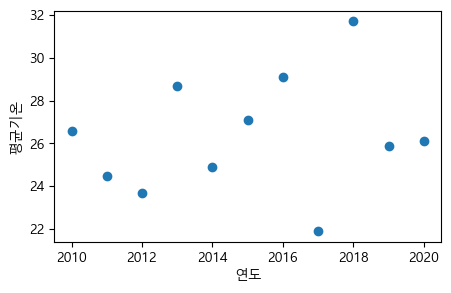

In [40]:
# 연도에 따른 평균기온 변화
fig = plt.figure(figsize=(5, 3))
X = seoul0815[['연도']]
Y = seoul0815['평균기온']
plt.xlabel('연도')
plt.ylabel('평균기온')
plt.scatter(X, Y)
plt.show()

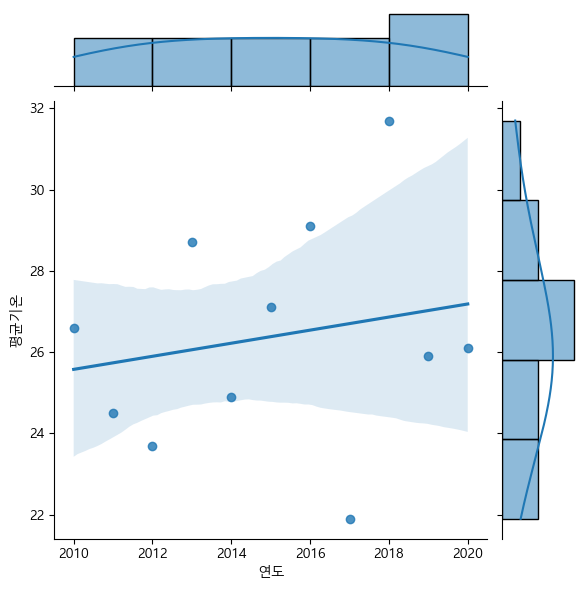

In [41]:
# jointplot 그리기
sns.jointplot(x='연도', y ='평균기온', kind='reg', data=seoul0815)
plt.show()

In [42]:
# 단순선형 회귀분석 : 2022년 8월 15일 기온 예측
model = LinearRegression()
X = seoul0815[['연도']]
Y = seoul0815['평균기온']
model.fit(X, Y)

future = pd.DataFrame({'연도': [2022]})
result = model.predict(future)
print(result)   

[27.50818182]


<br>

+ fit() 메서드는 선형 회귀 모델에 필요한 두 가지 변수를 전달
  + 기울기: line_fitter.coef_
  + 절편: line_fitter.intercept_
  + 이렇게 하면 새로운 X 값을 넣어 y값을 예측할 수 있게 됨
  + 싸이킷런 단순 선형회귀에서는 최소제곱법(Ordinary Least Squares)을 활용하기 때문

<br>

In [43]:
seoul0815.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 226 to 3879
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      11 non-null     datetime64[ns]
 1   평균기온    11 non-null     float64       
 2   최저기온    11 non-null     float64       
 3   최고기온    11 non-null     float64       
 4   연도      11 non-null     int32         
 5   월       11 non-null     int32         
 6   일       11 non-null     int32         
dtypes: datetime64[ns](1), float64(3), int32(3)
memory usage: 572.0 bytes


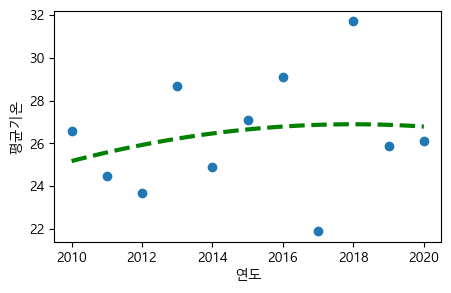

In [44]:
# 8월 15일 평균기온을 산점도, 회귀선 출력하기
x=seoul0815['연도']
y=seoul0815['평균기온']

fp1 = np.polyfit(x, y,2)
f1 = np.poly1d(fp1)
fx = np.linspace(2010, 2020)

plt.figure(figsize=(5, 3))
plt.scatter(x,y)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')

plt.xlabel('연도')
plt.ylabel('평균기온')
plt.show()

In [45]:
fp1
f1
fx

array([2010.        , 2010.20408163, 2010.40816327, 2010.6122449 ,
       2010.81632653, 2011.02040816, 2011.2244898 , 2011.42857143,
       2011.63265306, 2011.83673469, 2012.04081633, 2012.24489796,
       2012.44897959, 2012.65306122, 2012.85714286, 2013.06122449,
       2013.26530612, 2013.46938776, 2013.67346939, 2013.87755102,
       2014.08163265, 2014.28571429, 2014.48979592, 2014.69387755,
       2014.89795918, 2015.10204082, 2015.30612245, 2015.51020408,
       2015.71428571, 2015.91836735, 2016.12244898, 2016.32653061,
       2016.53061224, 2016.73469388, 2016.93877551, 2017.14285714,
       2017.34693878, 2017.55102041, 2017.75510204, 2017.95918367,
       2018.16326531, 2018.36734694, 2018.57142857, 2018.7755102 ,
       2018.97959184, 2019.18367347, 2019.3877551 , 2019.59183673,
       2019.79591837, 2020.        ])

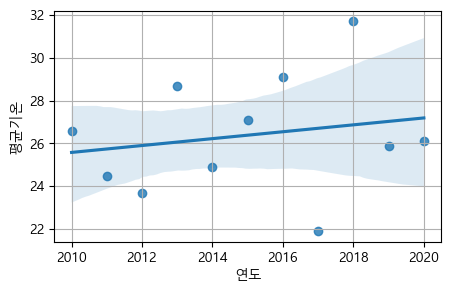

In [46]:
# 시본 모듈로 추세선 넣기
fig = plt.figure(figsize=(5, 3))   
sns.regplot(x='연도', y='평균기온', data=seoul0815) 
plt.grid()
plt.show()

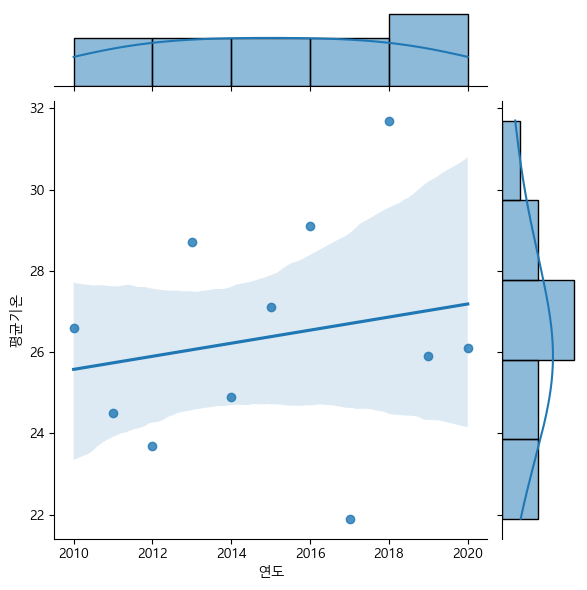

In [47]:
sns.jointplot(x='연도', y='평균기온', data=seoul0815, kind='reg')
plt.show()

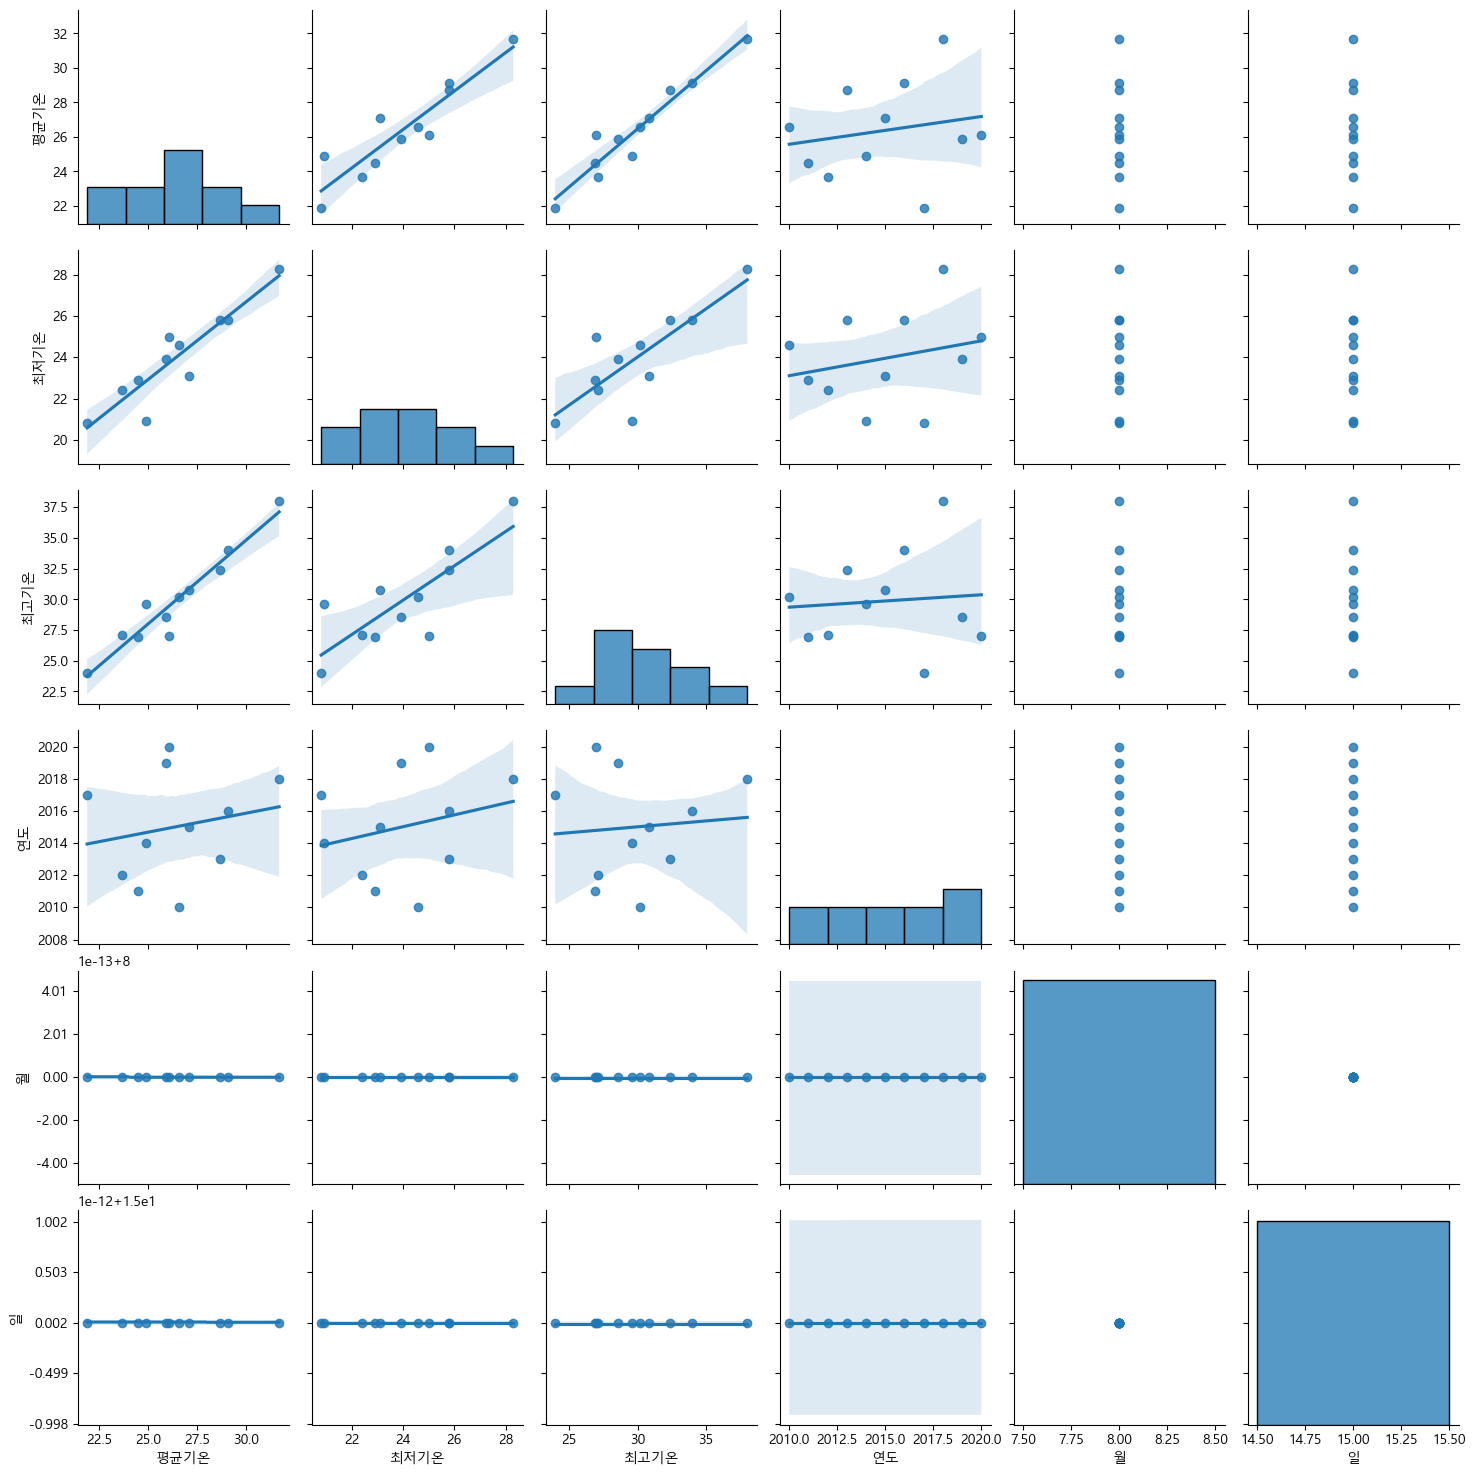

In [48]:
sns.pairplot(seoul0815, kind='reg')
plt.show()

<br>

### 8.2.2. 다중선형 회귀분석

<br>

In [49]:
seoul.info()
seoul.head()

<class 'pandas.core.frame.DataFrame'>
Index: 4017 entries, 0 to 4017
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      4017 non-null   datetime64[ns]
 1   평균기온    4017 non-null   float64       
 2   최저기온    4017 non-null   float64       
 3   최고기온    4017 non-null   float64       
 4   연도      4017 non-null   int32         
 5   월       4017 non-null   int32         
 6   일       4017 non-null   int32         
dtypes: datetime64[ns](1), float64(3), int32(3)
memory usage: 204.0 KB


,날짜,평균기온,최저기온,최고기온,연도,월,일
0,2010-01-01,-7.6,-12.7,-3.6,2010,1,1
1,2010-01-02,-3.6,-7.4,0.2,2010,1,2
2,2010-01-03,-6.8,-10.5,-3.2,2010,1,3
3,2010-01-04,-5.9,-8.0,-3.4,2010,1,4
4,2010-01-05,-9.9,-12.3,-7.0,2010,1,5


In [50]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

X = seoul0815[['연도','최저기온','최고기온']]
Y = seoul0815['평균기온']

model.fit(X, Y)
new_data = pd.DataFrame({'연도': [2022], '최저기온': [24], '최고기온': [33]})
result = model.predict(new_data)
print(result)

[28.08381871]


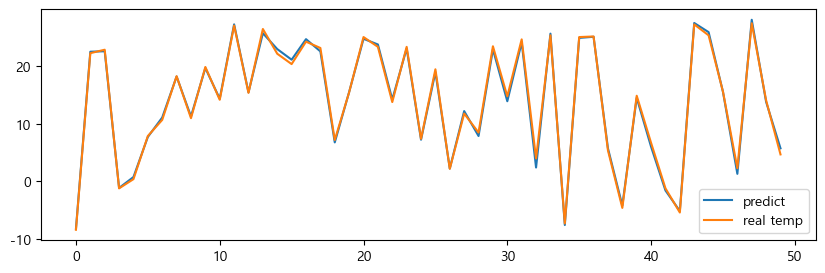

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
plt.figure(figsize=(10,3))

# 데이터 준비 : 속성(변수) 2가지 선택
X = seoul[['연도','최저기온','최고기온']]
Y = seoul['평균기온']

# 먼저 X와 Y변수를 받아 사이킷런의 train_test_split함수를 통해 7:3의 비율로 데이터를 분할한다.
x_train, x_test, y_train, y_test = train_test_split(X,Y, train_size = 0.7, test_size = 0.3)

#다중 선형 회귀 모델 생성
model = LinearRegression()
model.fit(x_train, y_train)

# 모델 테스트하기 : test셋의 일부 데이터를 가지고 모델의 예측결과가 얼마나 좋게 나타나는지 확인
plt.plot(model.predict(x_test[:50]), label='predict')
plt.plot(y_test[:50].values.reshape(-1, 1), label='real temp')
plt.legend()
plt.show()

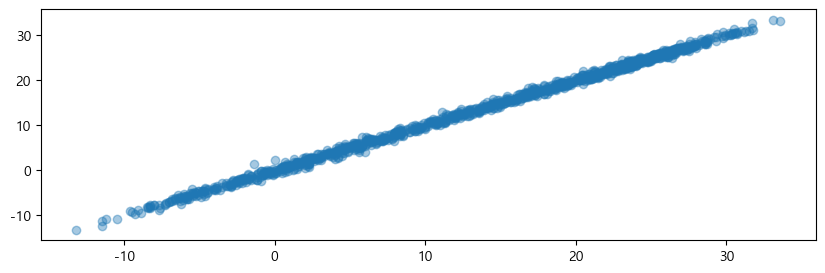

In [52]:
# 전체 데이터를 이용해 값을 예측하고 실제 값과 비교하여 산점도 그리기
plt.figure(figsize=(10, 3))
y_predict = model.predict(x_test)
plt.scatter(y_test, y_predict, alpha = 0.4)
plt.show()

In [53]:
# score 메소드를 통해 다중선형회귀 모델의 성능을 측정
print(model.score(x_train,y_train))
# 결정계수 R²의 최댓값은 1이며 이 수치가 클수록 실제값과 예측값이 유사함을 의미한다.
# 우리가 모델링한 다중선형회귀모델은 약 0.99의 결정계수를 가지며 
# 이는 X변수들이 y변수에 미치는 영향이 99%로 X변수들이 평균기온값 변동의 99%를 설명할 수 있다는 뜻임

0.9977009777834105
